# Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Load .npz file 

In [35]:
save_dir = r"D:\Ke Lab\SynologyDrive\09 Data\Fridge Data\Qubit\20231027_DR2_5XQ\01 Resonator Spectroscopy"  # change to .npz folder
save_name = "20231028-181656_06a_resonator_spectroscopy_vs_amplitude"  # change to .npz name

save_path = f"{save_dir}\{save_name}"
load_path =  f"{save_path}.npz"

# print(load_path)  # check whether the load path is vaild

data = np.load(load_path)
print(sorted(data))  # reveal data label

# F: frequency, R: amplitude, P: phase, U: Uphase, I: I-quadrature, Q: Q-quadrature

['F', 'I', 'P', 'Q', 'R', 'ReadoutAmplitude']


In [42]:
np.shape(data['R'])

(5, 101, 199)

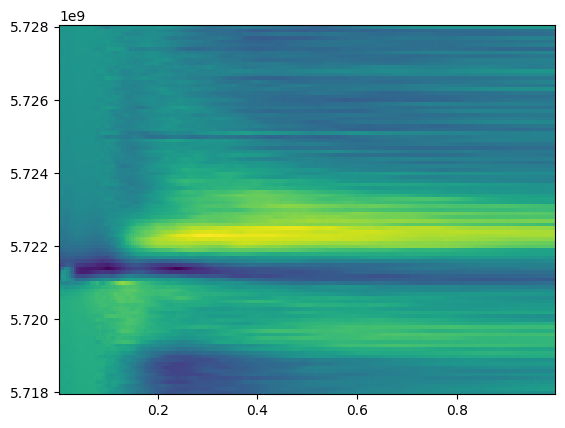

In [40]:
plt.pcolor(data['ReadoutAmplitude'][0], data['F'][0], data['R'][0])

# 04_resonator_spectroscopy_single

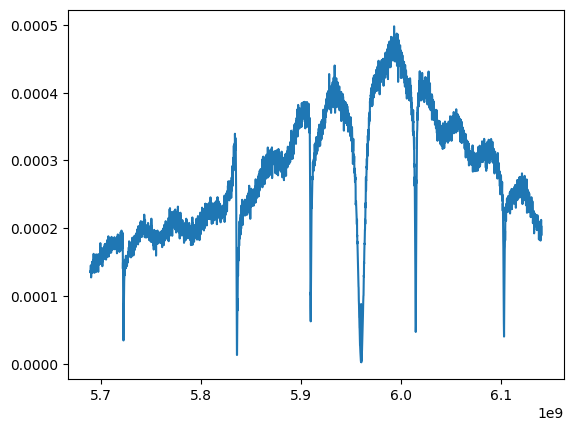

In [17]:
plt.plot(data['F'], data['R'])
# plt.axvline(x=-2.38e8, color='k')

# 05_resonator_spectroscopy_multiplexed

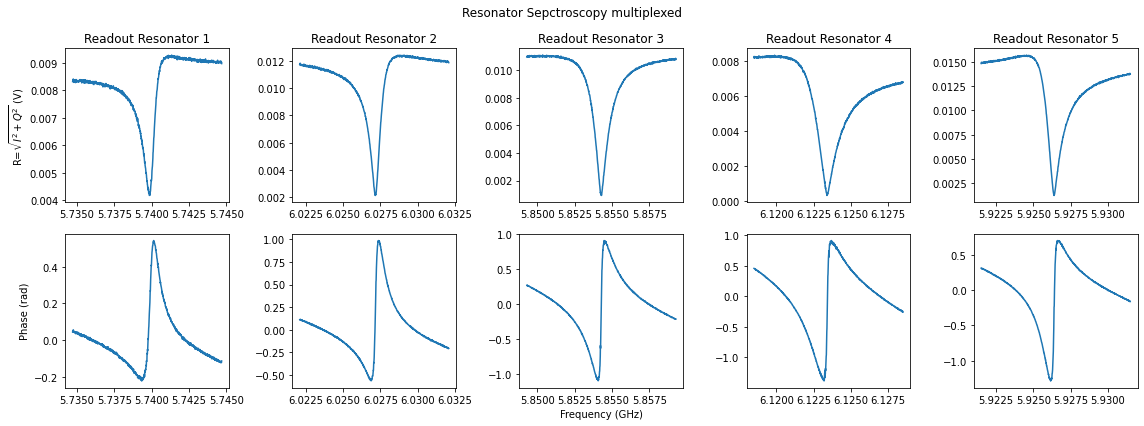

In [46]:
LO = 5.97e9

fig, ax = plt.subplots(2, 5, figsize=(16, 6))

for i in range(1,6):
    ax[0,i-1].plot((data[f'F{i}']+LO)/1e9, data[f'R{i}'])
    ax[0,i-1].set_title(f"Readout Resonator {i}")
    ax[1,i-1].plot((data[f'F{i}']+LO)/1e9, data[f'U{i}'])

ax[0,0].set_ylabel(r"R=$\sqrt{I^2 + Q^2}$ (V)")
ax[1,0].set_ylabel(r"Phase (rad)")
ax[1,2].set_xlabel("Frequency (GHz)")

# ax.set_xlabel("Frequency (GHz)")
plt.suptitle("Resonator Sepctroscopy multiplexed")
plt.tight_layout()
plt.show()


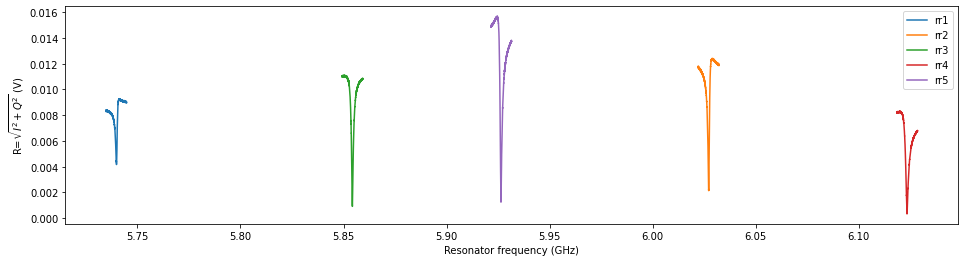

In [11]:
LO = 5.97e9

plt.figure(figsize=(16,4))

for i in range(1,6):
    plt.plot((data[f'F{i}']+LO)/1e9, data[f'R{i}'], label=f'rr{i}')
    
# plt.title(f"LO = {LO/1e9}GHz")
plt.xlabel("Resonator frequency (GHz)")
plt.ylabel(r"R=$\sqrt{I^2 + Q^2}$ (V)")
    
plt.legend()
plt.show()

# 06_resonator_spectroscopy_vs_flux

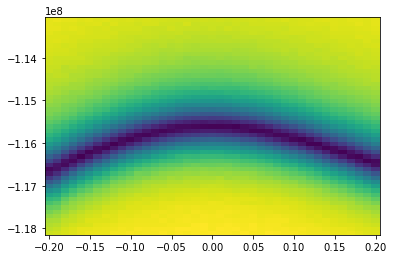

In [9]:
plt.pcolor(data['flux'], data['F3'], data['R3'])

# 06_resonator_spectroscopy_vs_amplitude

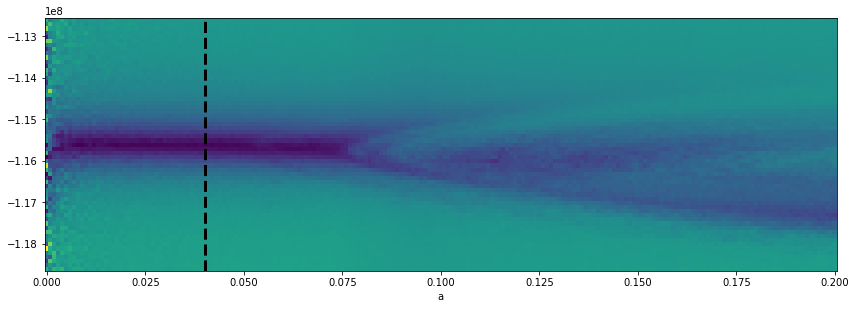

In [68]:
plt.pcolor(data["readout_amp_q3"], data['F3'], data['R3'])
# plt.axhline(y=-1.156e8, color='k', linewidth=3, linestyle='--')
# plt.axhline(y=-1.175e8, color='k', linewidth=3, linestyle='--')
plt.axvline(x=0.04, color='k', linewidth=3, linestyle='--')
plt.xlabel("a")

figure = plt.gcf() # get current figure
figure.set_size_inches(12, 4.4)
plt.tight_layout()
plt.show()

# 07_qubit_spectroscopy

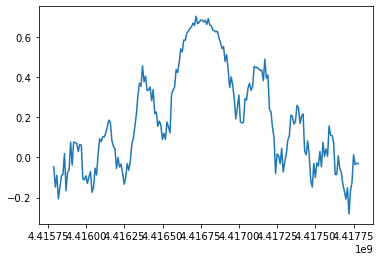

In [20]:
# plt.plot(data['F4'], data['R4'])
plt.plot(data['F4'], data['U4'])

# 08_qubit_spectroscopy_vs_flux_simultaneous

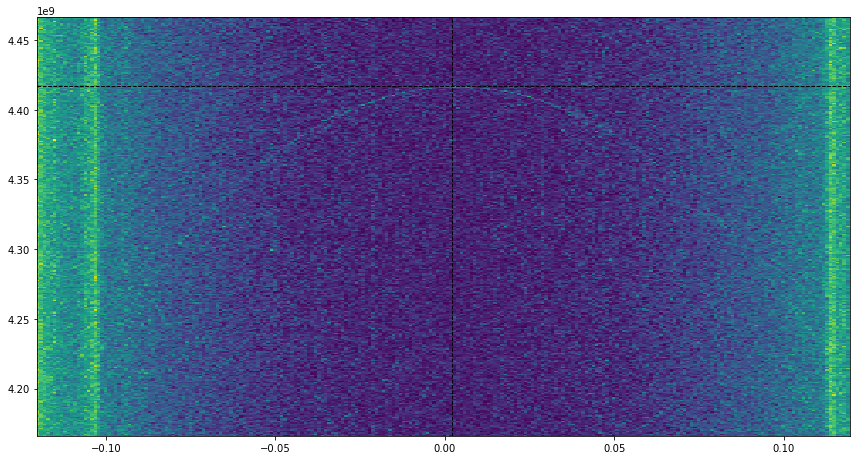

In [80]:
plt.pcolor(data['flux4'], data['F4'], data['R4'])
plt.axvline(x=0.002, color='k', linewidth=1, linestyle='--')
plt.axhline(y=4.41666e9, color='k', linewidth=1, linestyle='--')

figure = plt.gcf() # get current figure
figure.set_size_inches(12, 6.5)
plt.tight_layout()
plt.show()

# 09_rabi_chevron

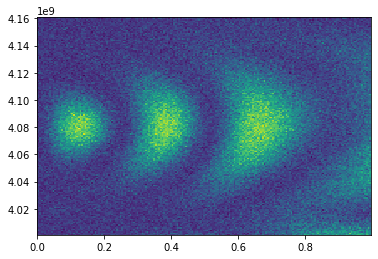

In [55]:
plt.pcolor(data['amp3'], data['F3'], data['I3'])

# 10_power_rabi

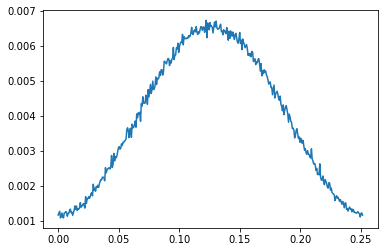

In [61]:
plt.plot(data['amp3'], data['I3'][0])

# 09_rabi_chevron_duration

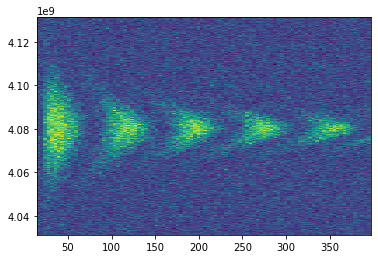

In [72]:
plt.pcolor(data['durations'], data['F3'], data['I3'])

# 11_IQ_blobs

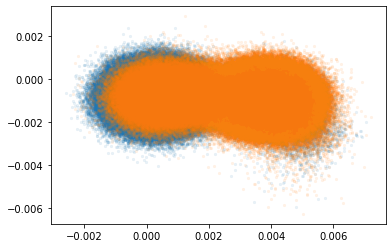

In [9]:
plt.scatter(data['I_g_q3'], data['Q_g_q3'], marker='.', linewidths=0.1, alpha=0.1)
plt.scatter(data['I_e_q3'], data['Q_e_q3'], marker='.', linewidths=0.1, alpha=0.1)

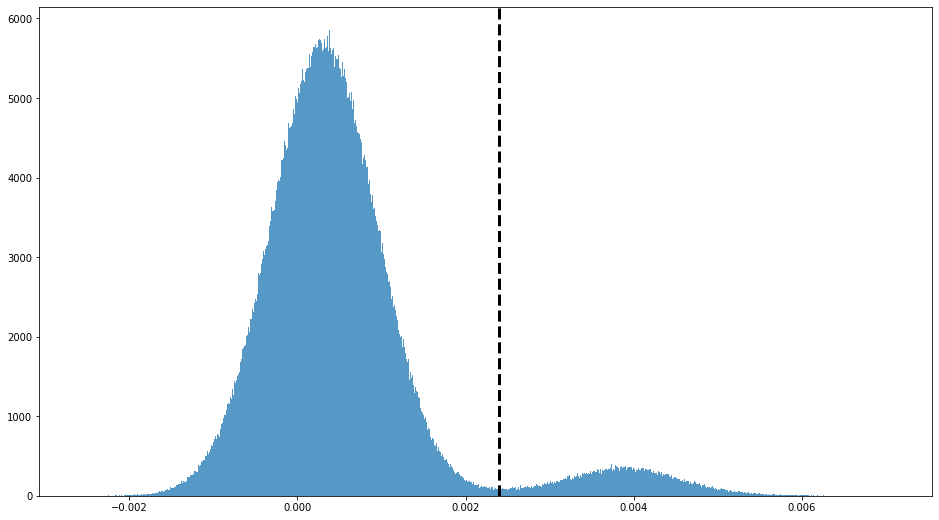

0.937175


In [13]:
threshold=0.0024
num_shot = len(data['I_g_q3'])

plt.figure(figsize=(16, 9))
plt.hist(data['I_g_q3'], bins=1000, alpha=0.75, label="Ground")
# plt.hist(data['I_e_q3'], bins=1000, alpha=0.75, label="Excited")

plt.axvline(x=threshold, color='k', linewidth=3, linestyle='--')
plt.show()

gg_prob = (data['I_g_q3'] < threshold).sum() / num_shot
print(gg_prob)

# 14_T1

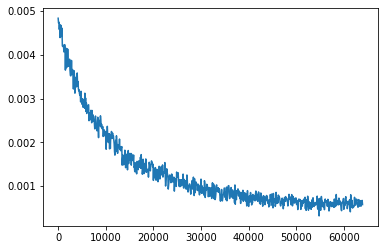

In [7]:
plt.plot(data['t_delay'], data['I4'])

# 15_ramsey_chevron

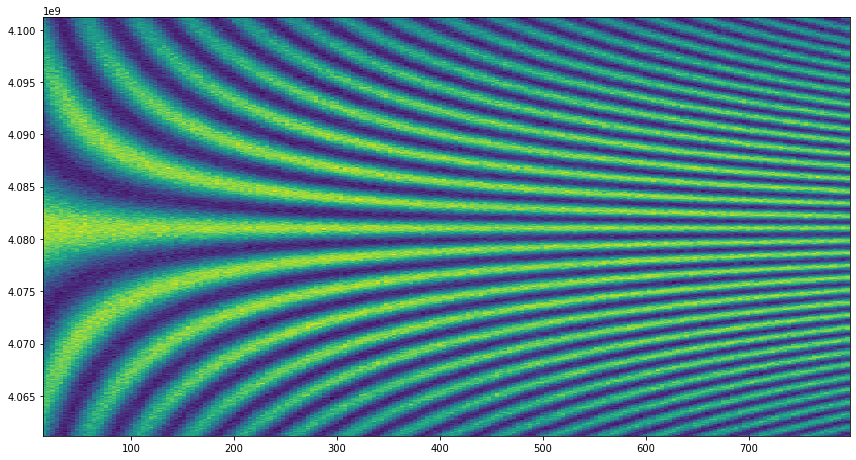

In [18]:
plt.pcolor(data['t_delay'], data['F3'], data['I3'])
# plt.axhline(y=4.41677e9, color='k', linewidth=3, linestyle='--')

figure = plt.gcf() # get current figure
figure.set_size_inches(12, 6.5)
plt.tight_layout()
plt.show()

In [110]:
a = True
print(a)

True


# 16_Ramsey

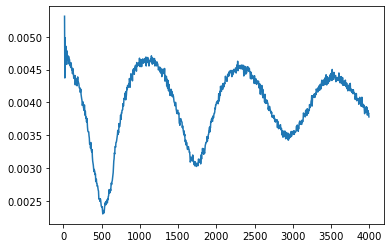

In [9]:
plt.plot(data['idle_times'], data['I3'])

# 18_single_qubit_RB_interleaved

Text(0, 0.5, 'Sequence Fidelity')

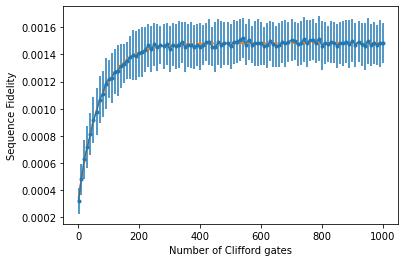

In [18]:
# ['interleaved_gate_index', 'x', 'y_avg', 'y_err', 'y_fit']

# Plots
plt.figure()
plt.errorbar(data['x'], data['y_avg'], yerr=data['y_err'], marker=".")
plt.plot(data['x'], data['y_fit'], linestyle="--", linewidth=2)
plt.xlabel("Number of Clifford gates")
plt.ylabel("Sequence Fidelity")
# plt.title(f"Q{qubit+2} Single qubit interleaved RB \n interleaved gate = {get_interleaved_gate(interleaved_gate_index)} \n \n Number of averaging loops for each random sequence = {n_avg} \n Error rate: 1-p = {np.format_float_scientific(one_minus_p, precision=2)} ({stdevs[2]:.1}) \n Clifford set infidelity: r_c = {np.format_float_scientific(r_c, precision=2)} ({r_c_std:.1}) \n Gate infidelity: r_g = {np.format_float_scientific(r_g, precision=2)}  ({r_g_std:.1})")
